In [2]:
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
import matplotlib as mpl
from os.path import join as pjoin
import matplotlib.font_manager as font_manager 

In [7]:
# define path and params
# make sure the dataset_path are modified based on your personal dataset downloading directory
dataset_path = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/data_upload/HAD'
fmriprep_path = pjoin(dataset_path, 'derivatives', 'fmriprep')
support_path = './support_files'
# change to path of current file
os.chdir(os.path.abspath(''))
mot_params = ['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z']
sub_dirs = [ _ for _ in os.listdir(fmriprep_path) if 'sub' in _ and '.' not in _ ]
sub_dirs.sort()
flag = 'action'
FD_sum = {}

# loop to get frame displacement value
for sub_dir in sub_dirs:
    FD_tmp = []
    files = [ _ for _ in os.listdir(pjoin(fmriprep_path, sub_dir)) if 'desc-confounds_timeseries.tsv' in _ \
                and int(re.findall(r'run-\d+', _)[0].split('-')[-1])<=12]
    files.sort()
    for file in files:
        df = pd.read_csv(pjoin(fmriprep_path, f'{sub_dir}/{file}'), sep='\t')
        FD = np.sum(tuple([np.abs(df[_].values) for _ in mot_params]), axis=0)
        # FD_index = np.nanmedian(FD)
        # concatenate data
        FD_tmp.extend(FD.tolist())
    FD_sum[sub_dir] = FD_tmp
    print(f'Finish {sub_dir} with {len(files)} runs')

Finish sub-01 with 12 runs
Finish sub-02 with 12 runs
Finish sub-03 with 12 runs
Finish sub-04 with 12 runs
Finish sub-05 with 12 runs
Finish sub-06 with 12 runs
Finish sub-07 with 12 runs
Finish sub-08 with 12 runs
Finish sub-09 with 12 runs
Finish sub-10 with 12 runs
Finish sub-11 with 12 runs
Finish sub-12 with 12 runs
Finish sub-13 with 12 runs
Finish sub-14 with 12 runs
Finish sub-15 with 12 runs
Finish sub-16 with 12 runs
Finish sub-17 with 12 runs
Finish sub-18 with 12 runs
Finish sub-19 with 12 runs
Finish sub-20 with 12 runs
Finish sub-21 with 12 runs
Finish sub-22 with 12 runs
Finish sub-23 with 12 runs
Finish sub-24 with 12 runs
Finish sub-25 with 12 runs
Finish sub-26 with 12 runs
Finish sub-27 with 12 runs
Finish sub-28 with 12 runs
Finish sub-29 with 12 runs
Finish sub-30 with 12 runs


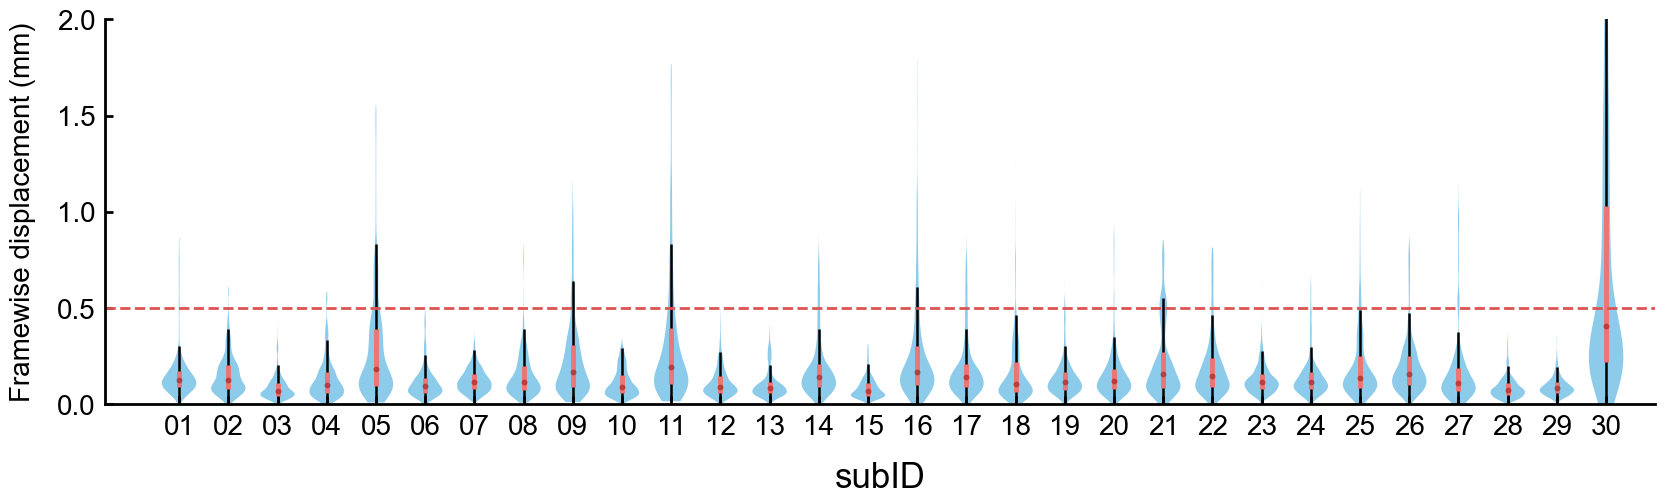

In [8]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value
# mpl.rcParams.update({'font.size': 10.5, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig,ax = plt.subplots(figsize=(20,5))
width=0.7

median = []
for i, sub_name in enumerate(FD_sum.keys()) :
    data = FD_sum[sub_name]
    parts = ax.violinplot(data, positions=[i], widths=width,showextrema=False,showmedians=False, vert=True)
    for pc in parts['bodies']:
        pc.set_facecolor('#81C6E8')
        pc.set_alpha(0.9)
    q1, medians, q3 = np.percentile(data, [25, 50, 75], axis=0)
    median.append(medians)
    whiskers = np.array([adjacent_values(np.sort(data), q1, q3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
    ax.scatter(i, medians, marker='o', color='#B73E3E', s=10, zorder=3)
    ax.vlines(i, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1.8)
    ax.vlines(i, q1, q3, color='red',edgecolors='#E97777', linestyle='-', lw=3.6)
    
# define plot details
font = font_manager.FontProperties(fname=pjoin(support_path, 'arial.ttf'), size=20, weight='bold')
ax.set_ylim([0,2])
ax.set_xlim([-1.5,30])
ax.plot([-1.5,30], [0.5, 0.5], ls='--',color='#DD5353',lw=2)
ax.set_xticks(np.arange(30))
ax.set_xticklabels(['%02d'%(i+1) for i in np.arange(30)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.0)
ax.spines['bottom'].set_linewidth(2.0)
ax.tick_params(labelsize=18, width=2, length=6, direction="in", pad=7)
# plot detail
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel('Framewise displacement (mm)', fontproperties=font, size=20, labelpad=15)
plt.xlabel('subID', fontproperties=font, size=25, labelpad=15)
plt.show()
# fig.savefig(f'/nfs/z1/userhome/ZhouMing/workingdir/BIN/action/utils/HAD/validation/support_files/FD_TR.jpg',dpi=300,bbox_inches='tight')

In [4]:
# delete the sub-30 to see the head motion across the remaining participants
del median[29]
print('Mean of the individual median FD for all participants except sub-30: %.3f'%np.array(median).mean())
print('Minimum of the individual median FD for all participants except sub-30: %.3f'%np.array(median).min())
print('Maximum of the individual median FD for all participants except sub-30: %.3f'%np.array(median).max())

Mean of the individual median FD for all participants except sub-30: 0.122
Minimum of the individual median FD for all participants except sub-30: 0.070
Maximum of the individual median FD for all participants except sub-30: 0.195
